In [4]:
from dataset import Monuseg, TNBC2
import matplotlib.pyplot as plt
from skimage.io import imsave
import utils
from matplotlib import cm
import numpy as np


In [5]:
def colorize(grayscale, colormap = "viridis"):
    cmap = cm.get_cmap(colormap, 5)
    return cmap(grayscale.astype(np.float))

<ipython-input-25-505b10151631>:28: UserWarning: ../docs/image.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave("../docs/image.png", binary_mask)
<ipython-input-25-505b10151631>:29: UserWarning: ../docs/binary_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave("../docs/binary_mask.png", binary_mask)
<ipython-input-25-505b10151631>:30: UserWarning: ../docs/boundary_mask.png is a low contrast image
  imsave("../docs/boundary_mask.png", boundary_mask)
Lossy conversion from int8 to uint8. Range [-3, -1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-25-505b10151631>:31: UserWarning: ../docs/weight_map.png is a low contrast image
  imsave("../docs/weight_map.png", weight_map)
Lossy conversion from int8 to uint8. Range [-10, -1]. Convert image to uint8 prior to saving to suppres

0.06282308


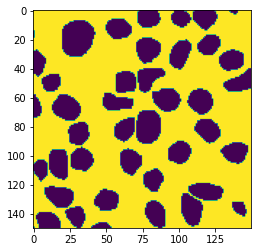

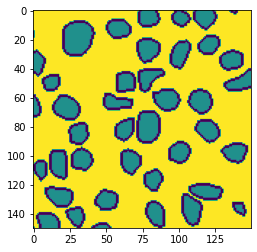

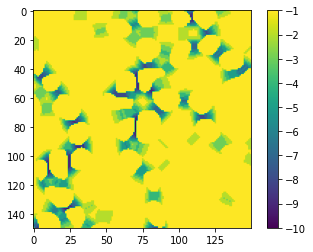

In [25]:
#boundary mask
dataset = Monuseg()
imid = dataset.ids[0]
img = dataset.load_image(imid)
mask = dataset.get_mask(imid)

ow, iw, bw = utils.class_weights(dataset, 50)
print(bw)

size = 150
x = 400
y = x
c = (slice(x, x+size, None), slice(x,y+size, None))

cmap = 'viridis'
image = dataset.load_image(imid)
binary_mask = np.invert(utils.get_mask(imid)[c])
boundary_mask = np.invert(dataset.get_mask(imid)[c])
weight_map = np.invert(dataset.get_weight_map(imid)[c].astype(np.int8))

plt.figure()
plt.imshow(binary_mask)
plt.figure()
plt.imshow(boundary_mask)
plt.figure()
plt.imshow(weight_map)
plt.colorbar()
imsave("../docs/image.png", binary_mask)
imsave("../docs/binary_mask.png", binary_mask)
imsave("../docs/boundary_mask.png", boundary_mask)
imsave("../docs/weight_map.png", weight_map)

In [ ]:
from 